In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.cluster import MiniBatchKMeans

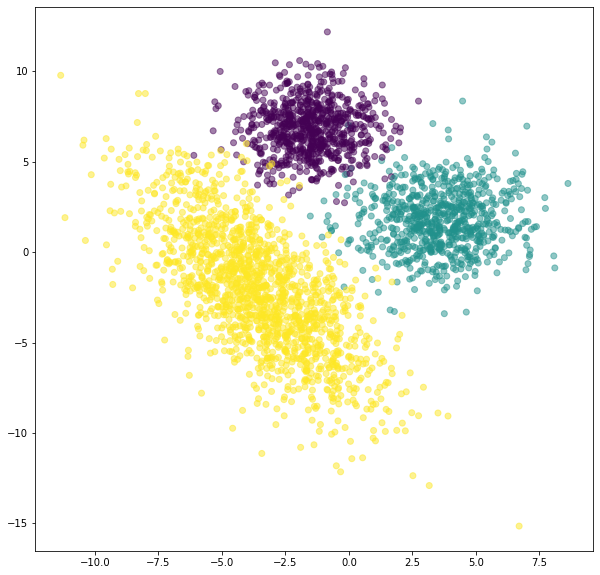

{0: 750, 1: 750, 2: 1500}

In [2]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

In [7]:
#7.5.2
km=KMeans(n_clusters=3,random_state=42)
km.fit(X)
print(np.round(km.cluster_centers_).astype(np.int))


[[-3 -3]
 [-2  6]
 [ 4  2]]


In [19]:
#7.5.3
k_means_pred = km.labels_
klaster,counts = np.unique(k_means_pred, return_counts=True)
for i in klaster:
    print(f'{i} = {counts[i]}')


0 = 1321
1 = 938
2 = 741


In [22]:

df= pd.read_csv('snsdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [24]:
df.drop(['gradyear','gender','age','friends'],axis=1, inplace=True)
df.head()

basketball  football  soccer  softball  volleyball  swimming  cheerleading  \
0           0         0       0         0           0         0             0   
1           0         1       0         0           0         0             0   
2           0         1       0         0           0         0             0   
3           0         0       0         0           0         0             0   
4           0         0       0         0           0         0             0   

   baseball  tennis  sports  ...  blonde  mall  shopping  clothes  hollister  \
0         0       0       0  ...       0     0         0        0          0   
1         0       0       0  ...       0     1         0        0          0   
2         0       0       0  ...       0     0         0        0          0   
3         0       0       0  ...       0     0         0        0          0   
4         0       0       0  ...       0     0         2        0          0   

   abercrombie  die  death  drunk  drugs  
0            0    0      0      0      0  
1            0    0      0      0      0  
2            0    0      1      0      0  
3            0    0      0      0      0  
4            0    0      0      1      1  

[5 rows x 36 columns]

In [33]:
#7.5.4
X=df.to_numpy()
X = StandardScaler().fit_transform(X)
k_means=KMeans(n_clusters=9, random_state=123)
k_means.fit(X)
k_means_pred=k_means.labels_
klaster,counts = np.unique(k_means_pred, return_counts=True)
for i in klaster:
    print(f'{i} = {counts[i]}')

0 = 20345
1 = 424
2 = 830
3 = 1
4 = 1026
5 = 932
6 = 644
7 = 5034
8 = 764


In [36]:
df['cluster_label']=k_means_pred
df.head()

basketball  football  soccer  softball  volleyball  swimming  cheerleading  \
0           0         0       0         0           0         0             0   
1           0         1       0         0           0         0             0   
2           0         1       0         0           0         0             0   
3           0         0       0         0           0         0             0   
4           0         0       0         0           0         0             0   

   baseball  tennis  sports  ...  mall  shopping  clothes  hollister  \
0         0       0       0  ...     0         0        0          0   
1         0       0       0  ...     1         0        0          0   
2         0       0       0  ...     0         0        0          0   
3         0       0       0  ...     0         0        0          0   
4         0       0       0  ...     0         2        0          0   

   abercrombie  die  death  drunk  drugs  cluster_label  
0            0    0      0      0      0              0  
1            0    0      0      0      0              7  
2            0    0      1      0      0              0  
3            0    0      0      0      0              0  
4            0    0      0      1      1              5  

[5 rows x 37 columns]

In [37]:
for k, group in df.groupby('cluster_label'):
    print(k)
    top_words = group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)
    print(top_words)

0
music         0.540477
god           0.312362
dance         0.213320
hair          0.180487
shopping      0.167117
basketball    0.160777
football      0.158073
band          0.154239
cute          0.148783
rock          0.147161
dtype: float64
1
god           4.742925
jesus         2.018868
church        1.740566
bible         1.108491
music         1.084906
hair          0.459906
band          0.410377
dance         0.389151
die           0.360849
basketball    0.351415
dtype: float64
2
hollister      1.522892
abercrombie    1.168675
shopping       0.920482
hair           0.913253
music          0.906024
dance          0.693976
mall           0.669880
cute           0.610843
god            0.457831
clothes        0.415663
dtype: float64
3
blonde      327.0
sex          22.0
hair         12.0
god          10.0
death         6.0
die           6.0
drunk         6.0
football      2.0
dress         2.0
sexy          1.0
dtype: float64
4
softball      2.548733
volleyball    1.967836
bask

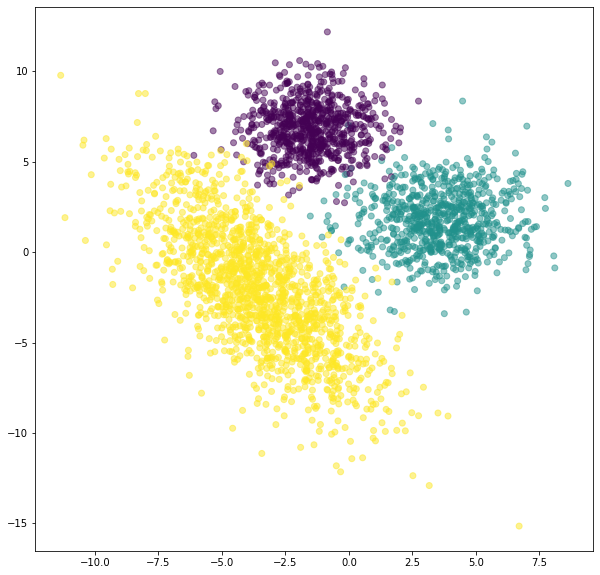

In [17]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
y_pred=gm.predict(X)
ans=np.c_[X,y_pred]



In [19]:
#7.6.2
for i in range(0,3):
    print(np.round(np.mean(ans[ans[:,2]==i],axis=0)).astype(np.int))

[-2 -5  0]
[1 4 1]
[-5  1  2]


In [20]:
#7.6.3
klaster,counts = np.unique(y_pred, return_counts=True)
for i in klaster:
    print(f'{i} = {counts[i]}')

0 = 788
1 = 1510
2 = 702


In [21]:
#7.6.4
df= pd.read_csv('snsdata.csv')
df.drop(['gradyear','gender','age','friends'],axis=1, inplace=True)
X=df.to_numpy()
X = StandardScaler().fit_transform(X)

gm=GaussianMixture(n_components=9,random_state=123)
gm.fit(X)
y_pred=gm.predict(X)
df['Cluster']=y_pred
df.head(8)

basketball  football  soccer  softball  volleyball  swimming  cheerleading  \
0           0         0       0         0           0         0             0   
1           0         1       0         0           0         0             0   
2           0         1       0         0           0         0             0   
3           0         0       0         0           0         0             0   
4           0         0       0         0           0         0             0   
5           0         0       0         0           0         0             0   
6           0         0       0         0           0         0             0   
7           0         0       0         1           0         0             0   

   baseball  tennis  sports  ...  mall  shopping  clothes  hollister  \
0         0       0       0  ...     0         0        0          0   
1         0       0       0  ...     1         0        0          0   
2         0       0       0  ...     0         0        0          0   
3         0       0       0  ...     0         0        0          0   
4         0       0       0  ...     0         2        0          0   
5         0       0       0  ...     0         1        0          0   
6         0       0       0  ...     2         0        0          2   
7         0       0       0  ...     0         0        0          0   

   abercrombie  die  death  drunk  drugs  Cluster  
0            0    0      0      0      0        4  
1            0    0      0      0      0        8  
2            0    0      1      0      0        4  
3            0    0      0      0      0        4  
4            0    0      0      1      1        3  
5            0    0      0      1      0        3  
6            0    0      0      0      0        0  
7            0    0      0      0      0        3  

[8 rows x 37 columns]

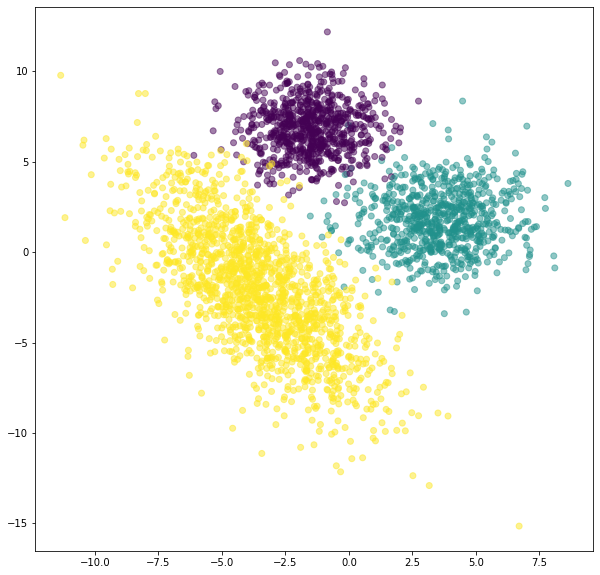

3000

In [32]:
#7.7.1
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

ac =AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred=ac.labels_
ac.n_leaves_

In [33]:
#7.7.2
klaster,counts = np.unique(y_pred, return_counts=True)
for i in klaster:
    print(f'{i} = {counts[i]}')

0 = 1112
1 = 1142
2 = 746


In [35]:
#7.7.3
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac=AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
ac.fit(X)
y_pred=ac.labels_
klaster,counts = np.unique(y_pred, return_counts=True)
for i in klaster:
    print(f'{i} = {counts[i]}')

0 = 1486
1 = 746
2 = 768


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [102.5, 102.5, 137.5, 137.5],
  [80.0, 80.0, 120.0, 120.0],
  [50.0, 50.0, 100.0, 100.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [182.5, 182.5, 225.625, 225.625],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [395.0, 395.0, 405.0, 

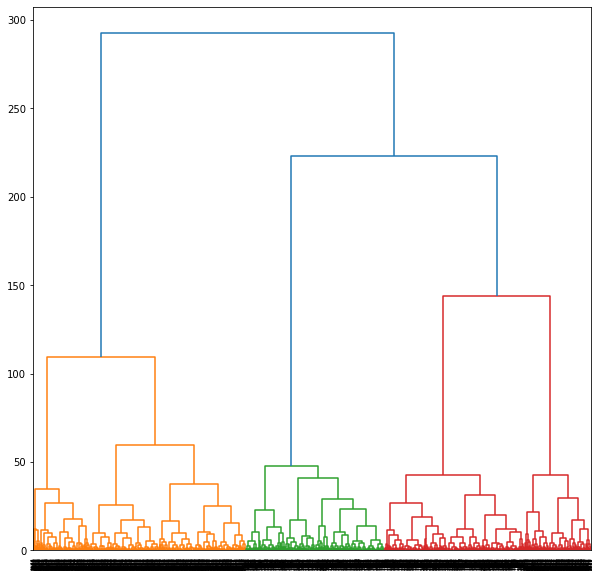

In [37]:
#7.7.4
Z = linkage(X, "ward")
dendrogram(Z, leaf_rotation=90.)

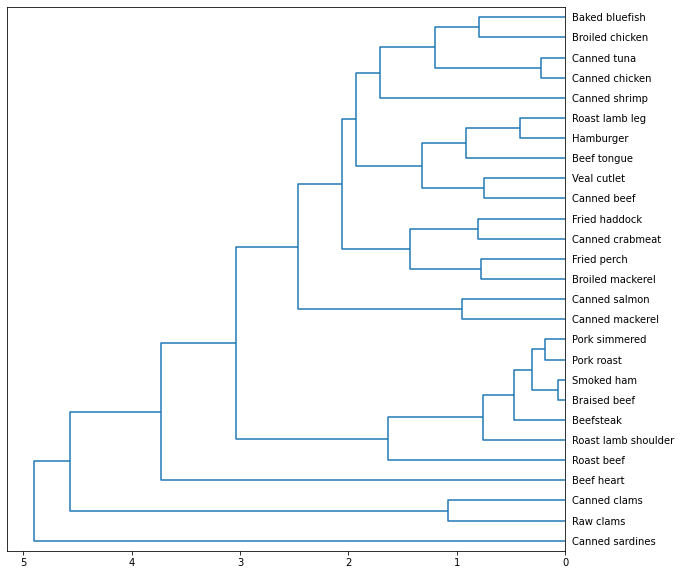

In [42]:
#7.7.5
dt=pd.read_csv('food.txt', sep=' ')
dt.head()
X=dt.drop(['Name'],axis=1).to_numpy()
X=StandardScaler().fit_transform(X)
Z = linkage(X, method='average', metric='euclidean')
names = dt.Name.values
dend = dendrogram(Z, color_threshold=0, labels=names, 
                  orientation='left')

In [46]:
t = 2.3
labels = fcluster(Z, t, criterion='distance')
dt['cluster']=labels
dt

Name  Energy  Protein  Fat  Calcium  Iron  cluster
0          Braised beef     340       20   28        9   2.6        2
1             Hamburger     245       21   17        9   2.7        4
2            Roast beef     420       15   39        7   2.0        2
3             Beefsteak     375       19   32        9   2.6        2
4           Canned beef     180       22   10       17   3.7        4
5       Broiled chicken     115       20    3        8   1.4        4
6        Canned chicken     170       25    7       12   1.5        4
7            Beef heart     160       26    5       14   5.9        5
8        Roast lamb leg     265       20   20        9   2.6        4
9   Roast lamb shoulder     300       18   25        9   2.3        2
10           Smoked ham     340       20   28        9   2.5        2
11           Pork roast     340       19   29        9   2.5        2
12        Pork simmered     355       19   30        9   2.4        2
13          Beef tongue     205       18   14        7   2.5        4
14          Veal cutlet     185       23    9        9   2.7        4
15       Baked bluefish     135       22    4       25   0.6        4
16            Raw clams      70       11    1       82   6.0        1
17         Canned clams      45        7    1       74   5.4        1
18      Canned crabmeat      90       14    2       38   0.8        4
19        Fried haddock     135       16    5       15   0.5        4
20     Broiled mackerel     200       19   13        5   1.0        4
21      Canned mackerel     155       16    9      157   1.8        3
22          Fried perch     195       16   11       14   1.3        4
23        Canned salmon     120       17    5      159   0.7        3
24      Canned sardines     180       22    9      367   2.5        6
25          Canned tuna     170       25    7        7   1.2        4
26        Canned shrimp     110       23    1       98   2.6        4

In [53]:
dt.query('Calcium>150 & Calcium<160')

Name  Energy  Protein  Fat  Calcium  Iron  cluster
21  Canned mackerel     155       16    9      157   1.8        3
23    Canned salmon     120       17    5      159   0.7        3

In [56]:
dt[dt.Fat== dt.Fat.max()]

Name  Energy  Protein  Fat  Calcium  Iron  cluster
2  Roast beef     420       15   39        7   2.0        2

In [19]:
#7.8.2
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))


DBS=DBSCAN(eps=0.9,min_samples=35)
DBS.fit(X)
y_pred=DBS.labels_

In [18]:
klaster,counts = np.unique(y_pred, return_counts=True)
for i in klaster:
    print(f'{i} = {counts[i]}')

-1 = 1255
0 = 368
1 = 656
2 = 721


In [9]:
#7.8.4
DBS=DBSCAN(eps=0.8,min_samples=35)
DBS.fit(X)
y_pred=DBS.labels_
klaster,counts = np.unique(y_pred, return_counts=True)
for i in klaster:
    print(f'{i} = {counts[i]}')

-1 = 1133
0 = 583
1 = 603
2 = 681


In [20]:
#7.11.1
gm=GaussianMixture(n_components=3,random_state=42)
gm.fit(X)
y_pred=gm.predict(X)
silhouette_score(X=X, labels=y_pred, metric='euclidean')

0.3988405457243407

In [22]:
#7.11.2
km=KMeans(n_clusters=3, random_state=42)
km.fit(X)
km_y_pred=km.labels_

ag=AgglomerativeClustering(n_clusters=3)
ag.fit(X)
ag_y_pred=ag.labels_

db=DBSCAN(eps=0.9,min_samples=35)
db.fit(X)
db_y_pred=db.labels_

print(f"K-means = {silhouette_score(X=X, labels=km_y_pred, metric='euclidean')}")
print(f"EM-alg = {silhouette_score(X=X, labels=y_pred, metric='euclidean')}")
print(f"Agglomerative = {silhouette_score(X=X, labels=ag_y_pred, metric='euclidean')}")
print(f"DBSCAN = {silhouette_score(X=X, labels=db_y_pred, metric='euclidean')}")



K-means = 0.5131660482634046
EM-alg = 0.3988405457243407
Agglomerative = 0.4811992210663849
DBSCAN = 0.4454335539277996


In [56]:
#7.11.3
km=KMeans(n_clusters=3, random_state=42)
km.fit(X)
km_y_pred=km.labels_

gm=GaussianMixture(n_components=4,random_state=42)
gm.fit(X)
gm_y_pred=gm.predict(X)

ag=AgglomerativeClustering(n_clusters=4)
ag.fit(X)
ag_y_pred=ag.labels_

print(f"K-means = {silhouette_score(X=X, labels=km_y_pred, metric='euclidean')}")
print(f"EM-alg = {silhouette_score(X=X, labels=gm_y_pred, metric='euclidean')}")
print(f"Agglomerative = {silhouette_score(X=X, labels=ag_y_pred, metric='euclidean')}")


K-means = 0.5131660482634046
EM-alg = 0.510655066343949
Agglomerative = 0.48470679039805054


In [4]:
#7.12.1

X=StandardScaler().fit_transform(X)

km=KMeans(n_clusters=3, random_state=42)
km.fit(X)
km_y_pred=km.labels_

gm=GaussianMixture(n_components=3,random_state=42)
gm.fit(X)
gm_y_pred=gm.predict(X)

ag=AgglomerativeClustering(n_clusters=3)
ag.fit(X)
ag_y_pred=ag.labels_

db=DBSCAN(eps=0.9,min_samples=35)
db.fit(X)
db_y_pred=db.labels_

print(f"K-means = {homogeneity_score(labels_true=y, labels_pred=km_y_pred)}")
print(f"EM-alg = {homogeneity_score(labels_true=y, labels_pred=gm_y_pred)}")
print(f"Agglomerative = {homogeneity_score(labels_true=y, labels_pred=ag_y_pred)}")
print(f"DBSCAN = {homogeneity_score(labels_true=y, labels_pred=db_y_pred)}")


K-means = 0.804474693112785
EM-alg = 0.9339791347507893
Agglomerative = 0.9099781767383747
DBSCAN = 0.00044465831964150197


In [61]:
#7.13.1

print(f"K-means = {completeness_score(labels_true=y, labels_pred=km_y_pred)}")
print(f"EM-alg = {completeness_score(labels_true=y, labels_pred=gm_y_pred)}")
print(f"Agglomerative = {completeness_score(labels_true=y, labels_pred=ag_y_pred)}")
print(f"DBSCAN = {completeness_score(labels_true=y, labels_pred=db_y_pred)}")

K-means = 0.7828224102025245
EM-alg = 0.9325740421656737
Agglomerative = 0.9058386997451113
DBSCAN = 0.08342237034907717


In [5]:
#7.14.1 

print(f"K-means = {v_measure_score(labels_true=y, labels_pred=km_y_pred)}")
print(f"EM-alg = {v_measure_score(labels_true=y, labels_pred=gm_y_pred)}")
print(f"Agglomerative = {v_measure_score(labels_true=y, labels_pred=ag_y_pred)}")
print(f"DBSCAN = {v_measure_score(labels_true=y, labels_pred=db_y_pred)}")


K-means = 0.793500872513578
EM-alg = 0.9332760595996924
Agglomerative = 0.9079037199053294
DBSCAN = 0.000884601531943088


In [6]:
#7.14.3
km1=KMeans(n_clusters=3,init='k-means++',n_init=1,random_state=42)
km1.fit(X)
km1_y_pred=km1.labels_

km2=KMeans(n_clusters=3,init='random',n_init=1,random_state=42)
km2.fit(X)
km2_y_pred=km2.labels_

print(f"K-means++ = {v_measure_score(labels_true=y, labels_pred=km1_y_pred)}")
print(f"K-means random = {v_measure_score(labels_true=y, labels_pred=km2_y_pred)}")


K-means++ = 0.7892280957870129
K-means random = 0.7892280957870129


In [12]:
#7.14.4
kmb=MiniBatchKMeans(n_clusters=3,n_init=1, random_state=42)
kmb.fit(X)
kmb_y_pred=kmb.labels_
print(f"MiniBatchKMean = {v_measure_score(labels_true=y, labels_pred=kmb_y_pred)}")

MiniBatchKMean = 0.7497460092948622


In [14]:
#7.14.5
ag=AgglomerativeClustering(n_clusters=3)
ag.fit(X)
ag_y_pred=ag.labels_

ag1=AgglomerativeClustering(n_clusters=3,linkage='complete')
ag1.fit(X)
ag1_y_pred=ag1.labels_

ag2=AgglomerativeClustering(n_clusters=3,linkage='average')
ag2.fit(X)
ag2_y_pred=ag2.labels_

ag3=AgglomerativeClustering(n_clusters=3,linkage='single')
ag3.fit(X)
ag3_y_pred=ag3.labels_

print(f"Agglomerative(word) = {v_measure_score(labels_true=y, labels_pred=ag_y_pred)}")
print(f"Agglomerative(complete) = {v_measure_score(labels_true=y, labels_pred=ag1_y_pred)}")
print(f"Agglomerative(average) = {v_measure_score(labels_true=y, labels_pred=ag2_y_pred)}")
print(f"Agglomerative(single) = {v_measure_score(labels_true=y, labels_pred=ag3_y_pred)}")

Agglomerative(word) = 0.9079037199053294
Agglomerative(complete) = 0.5805530251504777
Agglomerative(average) = 0.678656551579543
Agglomerative(single) = 0.0008842106330108959


In [15]:
#7.14.6
connectivity = kneighbors_graph(X, n_neighbors=
6, include_self=
False)
connectivity = 0.5 * (connectivity + connectivity.T)
ag_con=AgglomerativeClustering(n_clusters=3,connectivity=connectivity)
ag_con.fit(X)
ag_con_y_pred=ag_con.labels_
print(f"Agglomerative_con = {v_measure_score(labels_true=y, labels_pred=ag_con_y_pred)}")

Agglomerative_con = 0.883942992495597


In [21]:
#7.14.7

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))


db1=DBSCAN(eps=0.9, min_samples=35)
db1.fit(X)
db1_y_pred=db1.labels_

db2=DBSCAN(eps=0.8, min_samples=35)
db2.fit(X)
db2_y_pred=db2.labels_

print(f"DBSCAN(eps=0.9) = {v_measure_score(labels_true=y, labels_pred=db1_y_pred)}")
print(f"DBSCAN(eps=0.8) = {v_measure_score(labels_true=y, labels_pred=db2_y_pred)}")

DBSCAN(eps=0.9) = 0.7732549110297919
DBSCAN(eps=0.8) = 0.7063100442576922


In [34]:
#7.14.8
DBS=DBSCAN(eps=0.9,min_samples=35)
DBS.fit(X)
y_pred=DBS.labels_
new_y=[]
new_y_pred=[]
for i,k in enumerate(y_pred):
    if k!=-1:
        new_y.append(y[i])
        new_y_pred.append(y_pred[i])
new_y=np.asanyarray(new_y)
new_y_pred==np.asanyarray(new_y_pred)

print(f"DBSCAN = {v_measure_score(labels_true=new_y, labels_pred=new_y_pred)}")

DBSCAN = 0.9667281300681958


In [36]:
#7.14.9
ag=AgglomerativeClustering(n_clusters=3)
ag.fit(X)
ag_y_pred=ag.labels_

X=StandardScaler().fit_transform(X)

ag_st=AgglomerativeClustering(n_clusters=3)
ag_st.fit(X)
ag_st_y_pred=ag_st.labels_

print(f"Agglomerative = {v_measure_score(labels_true=y, labels_pred=ag_y_pred)}")
print(f"Agglomerative(st) = {v_measure_score(labels_true=y, labels_pred=ag_st_y_pred)}")

Agglomerative = 0.703747024360433
Agglomerative(st) = 0.9079037199053294


In [38]:
#7.14.10

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

X=MinMaxScaler().fit_transform(X)
ag_mm=AgglomerativeClustering(n_clusters=3)
ag_mm.fit(X)
ag_mm_y_pred=ag_mm.labels_

print(f"Agglomerative = {v_measure_score(labels_true=y, labels_pred=ag_y_pred)}")
print(f"Agglomerative(mm) = {v_measure_score(labels_true=y, labels_pred=ag_mm_y_pred)}")

Agglomerative = 0.703747024360433
Agglomerative(mm) = 0.8929241488344335
